In [4]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
%autoreload 2

In [23]:
%matplotlib inline

from functools import partial
import itertools
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt

from matplottoy.data import simplex
from matplottoy.encoders import position, color
from matplottoy.artists import line, point

import utils
spath = Path("../../../draft/figures/code/")

In [24]:
x = [lambda distances: distances, 
     lambda distances: np.cos(distances*(np.pi-np.pi/2) + np.pi/2)+2,
     lambda distances: np.cos(distances*(np.pi/2-np.pi)+np.pi/2)+2,
     lambda distances: distances + edge]

In [25]:
y = [lambda distance: 0 * distances, 
     lambda distances: np.sin(distances*(np.pi-np.pi/2) + np.pi/2),
     lambda distances: np.sin(distances*(np.pi/2-np.pi)+np.pi/2),
     lambda distances: 0 * distances
     ]

In [26]:
colors = [lambda distances : "red",
         lambda distances : "green",
         lambda distances : "orange",
         lambda distances : "blue"
]

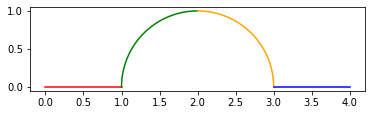

In [27]:
fig, ax = plt.subplots()
distances = np.linspace(0,1,1000)
for edge in range(4):
    ax.plot(x[edge](distances), y[edge](distances), color=colors[edge](distances))
ax.set_aspect('equal')

In [28]:
#implict edge id is the index/loc in the array
vertex_table = [(0,1), (1,2), (2,3), (3,4)]
edge_table = {'x':x, 'y':y, 'color':colors}

In [29]:
data = simplex.ContinuousLine(edge_table, vertex_table)

In [30]:
# data subsamples, 
# tau converts to axis coordinates
transforms = {'x': ('x', position.Identity()),
              'y': ('y', position.Identity()),
              'color': ('color', color.Identity())}

In [31]:
data.view("edge").keys()

dict_keys(['index', 'x', 'y', 'color'])

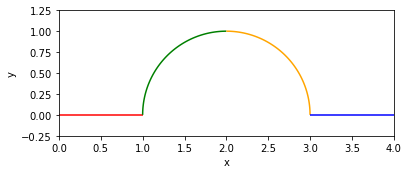

In [32]:
fig, ax = plt.subplots()

artist = line.Line(data, transforms)
ax.add_artist(artist)
ax.set(xlim = utils.mnx(data.FB.F[transforms['x'][0]]['range']),
       ylim = (-.25, 1.25), 
       xlabel = transforms['x'][0], 
       ylabel = transforms['y'][0], 
       aspect='equal')
fig.savefig(spath/"line_1.png")

In [33]:
transforms_0d = {'x': ('x', position.Identity()),       
                 'y': ('y', position.Identity()),
                 'facecolors': ('color', color.Identity()),
                 's': (None, lambda x: itertools.repeat(.05))} 

[(0.0, 4.0), (-0.25, 1.25), Text(0.5, 0, 'x'), Text(0, 0.5, 'y'), None]

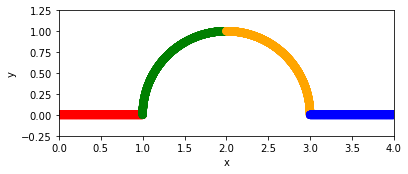

In [34]:
fig, ax = plt.subplots()

artist = point.Point(data, transforms_0d)
ax.add_artist(artist)
ax.set(xlim = utils.mnx(data.FB.F[transforms['x'][0]]['range']),
       ylim = (-.25, 1.25), 
       xlabel = transforms['x'][0], 
       ylabel = transforms['y'][0], 
       aspect='equal')


In [35]:
transforms_0df = {'y': ('x', position.Identity()),       
                  'x': ('y', position.Identity()),
                 'facecolors': ('color', color.Identity())} 

In [ ]:
fig, ax = plt.subplots()

artist = point.Point(data, transforms_0df)
ax.add_artist(artist)
ax.set(xlim = (-.25,1.25),
       ylim = (0,4), 
       xlabel = transforms['x'][0], 
       ylabel = transforms['y'][0], 
       aspect='equal')

In [ ]:
import random
shuffled_data = list(zip(x,y,colors, vertex_table))
random.shuffle(shuffled_data)
xs, ys, cs, vs = zip(*shuffled_data)

In [ ]:
vs

In [ ]:
table = simplex.ContinuousLine({'x':xs, 'y':ys, 'color':cs}, vs)

In [ ]:
cmap = {'red':'hotpink', 'green':'lightblue', 'orange':'hotpink', 'blue':'lightblue'}
transforms = {'x': ('x', position.Identity()),
              'y': ('y', position.Identity()),
              'color': ('color', color.Categorical(cmap))}

In [ ]:
fig, ax = plt.subplots()

artist = line.Line(data, transforms)
ax.add_artist(artist)
ax.set(xlim = utils.mnx(data.FB.F[transforms['x'][0]]['range']),
       ylim = (-.25, 1.25), 
       xlabel = transforms['x'][0], 
       ylabel = transforms['y'][0], 
       aspect='equal')

In [ ]:
np.linspace(0,1,2)

In [ ]:
def sline(distances, start, stop):
    return distances*(stop-start) + start

def const(distances, pos):
    if isinstance(distances, float):
        return pos
    return np.ones(distances.shape)*pos

x = [lambda distances: const(distances, 0),
     lambda distances: sline(distances, 0, 2),
     lambda distances: const(distances, 2),
     lambda distances: sline(distances, 2, 5),
     lambda distances: const(distances, 5),
     lambda distances: sline(distances, 5, 9),
     lambda distances: const(distances, 9), 
     lambda distances: sline(distances, 9, 10),
     lambda distances: const(distances, 10),
     lambda distances: sline(distances, 10,12),]

y = [lambda distances: sline(distances, 0, 1),
     lambda distances: const(distances, 1),
     lambda distances: sline(distances, 1, 0),
     lambda distances: const(distances, 0),
     lambda distances: sline(distances, 0, 1),
     lambda distances: const(distances, 1),
     lambda distances: sline(distances, 1, 2),
     lambda distances: const(distances, 2),
     lambda distances: sline(distances, 2 , 0), 
     lambda distances: const(distances, 0)]
vertex_table = list(zip(range(len(x)), range(1, len(y)+1)))

In [ ]:
data = simplex.DiscontinousLine({'x':x, 'y':y}, vertex_table)

In [ ]:
transforms = {'x': ('x', position.Identity()),
              'y': ('y', position.Identity())}

In [ ]:
data.view()

In [ ]:
fig, ax = plt.subplots()

artist = line.Line(data, transforms)
ax.add_artist(artist)
ax.set(xlim=(-0.5,12.5), ylim=(-0.25,2.5))